In [590]:
# Mason Hall for 416 Final!
# At the end I tried to turn everything into functions so I hope this works (I did do some quick testing :))
# Ask me if any questions, I tried to add relevant comments :)

import networkx as nx
import numpy as np
import pandas as pd
import sys
import os
import scipy as sc
import math
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import itertools
from glob import glob
from collections import defaultdict
import operator
from scipy.cluster import hierarchy
from scipy.spatial import distance
from community import community_louvain


locationDict = {"South_40":1,"Village":2,"AC / Frat Row / Siegle":3,"Bauer / Law School / McMillan / Knight Hall":4,"DUC Area (Simon, DUC, Mallinckrodt, Umrath Hall)":5,"Biology / Psychology Area (Rebstock, Psych Building, Life Sciences, Wilson, Greenhouse, McDonnell)":6,"Chemistry Area (LabSci, Women's Building, Louderman, McMillen)":7,"Engineering Quad (Lopata, Urbauer, Sever, Cupples 2, Jolley)":8,"Brookings Quad (Olin Library, Eads, January, Duncker, Ridgley, Brookings, Cupples 1, Busch Hall)":9,"Brown School Area (Goldfarb, Brown, Hillman)":10,"Sam Fox Area (Givens, Steinberg, Kemper Art Museum, Walker, Bixby)":11,"Northeast Corner (Whitaker, Green, Brauer)":12}
#currently using IDs: 1-12)


betterLocationDict = {"South_40":1,"Village":2,"AC":3,"Law_Knight":4,"DUC_Malli":5,"Biology_Psych":6,"Chemistry":7,"Engineering_Quad":8,"Brookings":9,"Brown_School":10,"Sam_Fox_Area":11,"Northeast_Corner":12}

locList = ["subNum","School","year","South_40","Village","AC","Law_Knight","DUC_Malli","Biology_Psych","Chemistry","Engineering_Quad","Brookings","Brown_School","Sam_Fox_Area","Northeast_Corner"]


diningDict = {"Bauer Hall Cafe":21, "BD":22, "DUC":23, "Einsteins":24, "Ettas":25, 
              "Hillman":26, "Holmes":27, "Kayaks (or Zza, Bobos, Snarfs)":28, "Law School Cafeteria":29, "Loop":30, "Stanleys":31, "Subway":32, "Village":33, "Whispers":34}
#Using IDs: 21-34



#This function adds labels to whichever graph it is called on, but only if the 'label' attribute is set to true!
def drawWithLabels(K, spring_pos):
    newNames = {'South_40':25,'Northest_Corner':26,'BD':1, 'Village':2, 'Village_Dining':3, 'AC_Frat_Row':4, 'Bio_Psych':5, 'DUC':6, 'Chemistry':7, 'Engineering_Quad':8, 'Brown_School':9, 'Bauer_Law_School':10, 'Law_School_Cafeteria':11, 'DUC_Area':12, 'Brookings_Quad':13, 'Whispers':14, 'Holmes':15, 'Hillman':16, 'Sam_Fox':17, 'Stanleys':18, 'Einsteins':19, 'Off_Campus':20, 'Bauer_Hall_Cafe':21, 'Loop_Dining':22, 'Subway':23, 'Ettas':24}
    numToName = {x:y for y,x in newNames.items()}
    studNodes = [x for x,y in K.nodes(data=True) if y['student']=='true']
    diningNodes = [x for x,y in K.nodes(data=True) if y['type']=='Dining_Hall']
    sourceNodes = [x for x,y in K.nodes(data=True) if y['type']=='Source']
    importantNodes = [x for x,y in K.nodes(data=True) if y['label']=='true']
    labelCoords = {x:[0,0] for x in spring_pos}  
    theX = [spring_pos[node][0] for node in spring_pos]
    maxX = max(theX)
    minX = min(theX)
    theY = [spring_pos[node][1] for node in spring_pos]
    maxY = max(theY)
    minY = min(theY)
    rangeX = maxX - minX
    rangeY = maxY - minY
    numImport = len(importantNodes)

    rippedX = [spring_pos[node][0] for node in importantNodes]
    rippedY = [spring_pos[node][1] for node in importantNodes]

    linSpaceX = np.linspace(min(rippedX),max(rippedX),len(importantNodes))


    linSpaceY = np.linspace(min(rippedY),max(rippedY),len(importantNodes))


    newX = np.interp(rippedX, rippedX, linSpaceX)
    newY = np.interp(rippedY, rippedY, linSpaceY)

    newX = np.interp(rippedX, (min(rippedX),max(rippedX)), (min(theX),max(theX)))
    newY = np.interp(rippedY, (min(rippedY),max(rippedY)), (min(theY),max(theY)))

    newLinSpaceX = np.linspace(min(newX),max(newX),len(newX))
    newLinSpaceY = np.linspace(min(newY),max(newY),len(newY))



    iterator = 0
    for node in importantNodes:
        nodeX = spring_pos[node][0]
        nodeY = spring_pos[node][1]
        linX = linSpaceX[iterator]
        linY = linSpaceY[iterator]
        nodeX = newX[iterator]
        nodeY = newY[iterator]
        binX = np.digitize(nodeX,newLinSpaceX,numImport)
        binY = np.digitize(nodeY,newLinSpaceY,numImport)
        newCoord = [newLinSpaceX[binX], newLinSpaceY[binY]]


        labelCoords[node] = (newCoord)
        iterator += 1

    labelCoordsX = np.linspace(min(theX),max(theX),numImport+1)
    labelCoordsY  = np.linspace(min(theY),max(theY),numImport+1)

    topLeft = 1
    topRight = 1
    botLeft = 1
    botRight = 1

    for node in importantNodes:
        if((spring_pos[node][0] < 0) and (spring_pos[node][1] >= 0)):
            chosenY = max(theY)*1.1
            chosenX = labelCoordsX[topLeft]*1.1
            topLeft += 1
        elif((spring_pos[node][0] >= 0) and (spring_pos[node][1] < 0)):
            chosenY = min(theY)*1.1
            chosenX = labelCoordsX[-topRight]*1.1
            topRight += 1 
        elif((spring_pos[node][0] >= 0) and (spring_pos[node][1] >= 0)):
            chosenY = max(theY)*1.1
            chosenX = labelCoordsX[topLeft]*1.1
            topRight += 1
        elif((spring_pos[node][0] < 0) and (spring_pos[node][1] < 0)):
            chosenX = min(theX)*1.1
            chosenY = labelCoordsY[-topLeft]*1.1
            topLeft += 1
        else:
            print("This node {0} is ELSE".format(node))


        plt.annotate("{0}-{1}".format(numToName[node],node), 
                xy=spring_pos[node], 
                xytext=(chosenX,chosenY),
                color='blue',
                textcoords='data',
                arrowprops=dict(facecolor='blue', shrink=0.01, alpha=0.3)
            )
        iterator +=1

#Pretty green and red draw, students too if needed
#Doesn't use centrality coloring, purely based on attribute
def colorDraw(K,pos,labels):
    plt.figure(figsize=(10,10))
    plt.axis("off")
    spring_pos = pos
    studNodes = [x for x,y in K.nodes(data=True) if y['student']=='true']
    otherNodes = [x for x,y in K.nodes(data=True) if y['student']=='false']
    diningNodes = [x for x,y in K.nodes(data=True) if y['type']=='Dining_Hall']
    sourceNodes = [x for x,y in K.nodes(data=True) if y['type']=='Source']
    nx.draw_networkx_nodes(K, pos=spring_pos, nodelist=studNodes, cmap = plt.get_cmap("Wistia"), node_color ="purple", node_size = 10, with_labels=True, alpha=0.3,node_shape="x")
    nx.draw_networkx_nodes(K, pos=spring_pos, nodelist=diningNodes, cmap = plt.get_cmap("tab20c"), node_color="green", node_size=300, with_labels=True, node_shape="o",label="Dining Hall")
    nx.draw_networkx_nodes(K, pos=spring_pos, nodelist=sourceNodes, cmap = plt.get_cmap("tab20c"), node_color="red", node_size=300, with_labels=True, node_shape="o",label="Source")
    nx.draw_networkx_labels(nx.subgraph(K,otherNodes), pos=spring_pos)
    nx.draw_networkx_edges(K, pos=spring_pos, cmap = plt.get_cmap("jet"), alpha=0.3)
    plt.legend()
    if(labels):
        drawWithLabels(K,spring_pos)
    plt.show()

#Does the louvain partition method and draws the graph, 
#Takes in a graph (K,layout,and a boolean for labels)
#returns (graph,louvainPartition,layout)
def louvainDraw(K,pos,labels):
    plt.figure(figsize=(10,10))
    plt.axis("off")
    parts = community_louvain.best_partition(K)
    values = [parts.get(node) for node in K.nodes()]
    spring_pos = pos
    studNodes = [x for x,y in K.nodes(data=True) if y['student']=='true']
    otherNodes = [x for x,y in K.nodes(data=True) if y['student']=='false']
    values = [parts.get(node) for node in otherNodes]
    nx.draw_networkx_nodes(K, pos=spring_pos, nodelist=studNodes, cmap = plt.get_cmap("Wistia"), node_color ="purple", node_size = 10, with_labels=True, alpha=0.3,node_shape="x")
    nx.draw_networkx_nodes(K, pos=spring_pos, nodelist=otherNodes, cmap = plt.get_cmap("tab20c"), node_color=values, node_size=300, with_labels=True, node_shape="o")
    nx.draw_networkx_labels(nx.subgraph(K,otherNodes), pos=spring_pos)
    nx.draw_networkx_edges(K, pos=spring_pos, cmap = plt.get_cmap("jet"), alpha=0.3)
    if(labels):
        drawWithLabels(K,spring_pos)
    plt.show()
    return(K,parts,spring_pos)

#Draws the graph for betweenness centrality
#Takes in a graph (K,layout,and a boolean for labels)
#returns (Betweenness Centrality Dictionary)
def betweenness(K,pos,labels):
    print("\n betweenness:")
    plt.figure(figsize=(10,10))
    plt.axis("off")
    spring_pos = pos
    bwDict = nx.algorithms.centrality.betweenness_centrality(K)
    studNodes = [x for x,y in K.nodes(data=True) if y['student']=='true']
    otherNodes = [x for x,y in K.nodes(data=True) if y['student']=='false']
    
    newColors = [bwDict[node] for node in otherNodes]
    nx.draw_networkx_nodes(K, pos=spring_pos, nodelist=studNodes, cmap = plt.get_cmap("Wistia"), node_color ="purple", node_size = 10, with_labels=False, alpha=0.3,node_shape="x")
    nx.draw_networkx_nodes(K, pos=spring_pos, nodelist=otherNodes, cmap = plt.get_cmap("Wistia"), node_color=newColors, node_size=300, with_labels=True, node_shape="o")
    nx.draw_networkx_labels(nx.subgraph(K,otherNodes), pos=spring_pos)
    nx.draw_networkx_edges(K, pos=spring_pos, cmap = plt.get_cmap("jet"), alpha=0.3)
    if(labels):
        drawWithLabels(K,spring_pos)
    plt.show()
    sorted_x = sorted(bwDict.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_x

#Draws the graph with closness centrality
#Takes in a graph (K,layout,and a boolean for labels)
#returns (Closeness Centrality Dictionary)
def closeness(K,pos,labels):
    print("\n closeness:")
    plt.figure(figsize=(10,10))
    plt.axis("off")
    spring_pos = pos
    bwDict = nx.algorithms.centrality.closeness_centrality(K)
    studNodes = [x for x,y in K.nodes(data=True) if y['student']=='true']
    otherNodes = [x for x,y in K.nodes(data=True) if y['student']=='false']
    newColors = [bwDict[node] for node in otherNodes]
    nx.draw_networkx_nodes(K, pos=spring_pos, nodelist=studNodes, cmap = plt.get_cmap("Wistia"), node_color ="purple", node_size = 10, with_labels=False, alpha=0.3,node_shape="x")
    nx.draw_networkx_nodes(K, pos=spring_pos, nodelist=otherNodes, cmap = plt.get_cmap("Wistia"), node_color=newColors, node_size=300, with_labels=True, node_shape="o")
    nx.draw_networkx_labels(nx.subgraph(K,otherNodes), pos=spring_pos)
    nx.draw_networkx_edges(K, pos=spring_pos, cmap = plt.get_cmap("jet"), alpha=0.3)
    if(labels):
        drawWithLabels(K,spring_pos)
    plt.show()
    sorted_x = sorted(bwDict.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_x


#Draws the graph with Eigenvector centrality
#Takes in a graph (K,layout,and a boolean for labels)
#returns (Eigenvector Centrality Dictionary)
def eigen(K,pos,labels):
    print("\n eigen:")
    plt.figure(figsize=(10,10))
    plt.axis("off")
    spring_pos = pos
    bwDict = nx.algorithms.centrality.eigenvector_centrality_numpy(K)
    studNodes = [x for x,y in K.nodes(data=True) if y['student']=='true']
    otherNodes = [x for x,y in K.nodes(data=True) if y['student']=='false']
    newColors = [bwDict[node] for node in otherNodes]
    nx.draw_networkx_nodes(K, pos=spring_pos, nodelist=studNodes, cmap = plt.get_cmap("Wistia"), node_color ="purple", node_size = 10, with_labels=False, alpha=0.3,node_shape="x")
    nx.draw_networkx_nodes(K, pos=spring_pos, nodelist=otherNodes, cmap = plt.get_cmap("Wistia"), node_color=newColors, node_size=300, with_labels=True, node_shape="o")
    nx.draw_networkx_labels(nx.subgraph(K,otherNodes), pos=spring_pos)
    nx.draw_networkx_edges(K, pos=spring_pos, cmap = plt.get_cmap("jet"), alpha=0.3)
    if(labels):
        drawWithLabels(K,spring_pos)
    plt.show()
    sorted_x = sorted(bwDict.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_x


#Draws the graph with current-flow betweenness centrality
#Takes in a graph (K,layout,and a boolean for labels)
#returns (current betweenness Centrality Dictionary)
def currentBetween(K,pos,labels):
    print("\n current between:")
    plt.figure(figsize=(10,10))
    plt.axis("off")
    spring_pos = pos
    bwDict = nx.algorithms.centrality.current_flow_betweenness_centrality(K)
    studNodes = [x for x,y in K.nodes(data=True) if y['student']=='true']
    otherNodes = [x for x,y in K.nodes(data=True) if y['student']=='false']
    newColors = [bwDict[node] for node in otherNodes]
    nx.draw_networkx_nodes(K, pos=spring_pos, nodelist=studNodes, cmap = plt.get_cmap("Wistia"), node_color ="purple", node_size = 10, with_labels=False, alpha=0.3,node_shape="x")
    nx.draw_networkx_nodes(K, pos=spring_pos, nodelist=otherNodes, cmap = plt.get_cmap("Wistia"), node_color=newColors, node_size=300, with_labels=True, node_shape="o")
    nx.draw_networkx_labels(nx.subgraph(K,otherNodes), pos=spring_pos)
    nx.draw_networkx_edges(K, pos=spring_pos, cmap = plt.get_cmap("jet"), alpha=0.3)
    if(labels):
        drawWithLabels(K,spring_pos)
    plt.show()
    sorted_x = sorted(bwDict.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_x

#Draws the graph with current-flow closeness centrality
#Takes in a graph (K,layout,and a boolean for labels)
#returns (current closeness Centrality Dictionary)
def currentCloseness(K,pos,labels):
    print("\n current close:")
    plt.figure(figsize=(10,10))
    plt.axis("off")
    spring_pos = pos
    bwDict = nx.algorithms.centrality.current_flow_closeness_centrality(K)
    studNodes = [x for x,y in K.nodes(data=True) if y['student']=='true']
    otherNodes = [x for x,y in K.nodes(data=True) if y['student']=='false']
    newColors = [bwDict[node] for node in otherNodes]
    nx.draw_networkx_nodes(K, pos=spring_pos, nodelist=studNodes, cmap = plt.get_cmap("Wistia"), node_color ="purple", node_size = 10, with_labels=False, alpha=0.3,node_shape="x",label="Students")
    nx.draw_networkx_nodes(K, pos=spring_pos, nodelist=otherNodes, cmap = plt.get_cmap("Wistia"), node_color=newColors, node_size=300, with_labels=True, node_shape="o",label="Locations")
    nx.draw_networkx_labels(nx.subgraph(K,otherNodes), pos=spring_pos)
    nx.draw_networkx_edges(K, pos=spring_pos, cmap = plt.get_cmap("jet"), alpha=0.3)
    if(labels):
        drawWithLabels(K,spring_pos)
    plt.show()
    sorted_x = sorted(bwDict.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_x



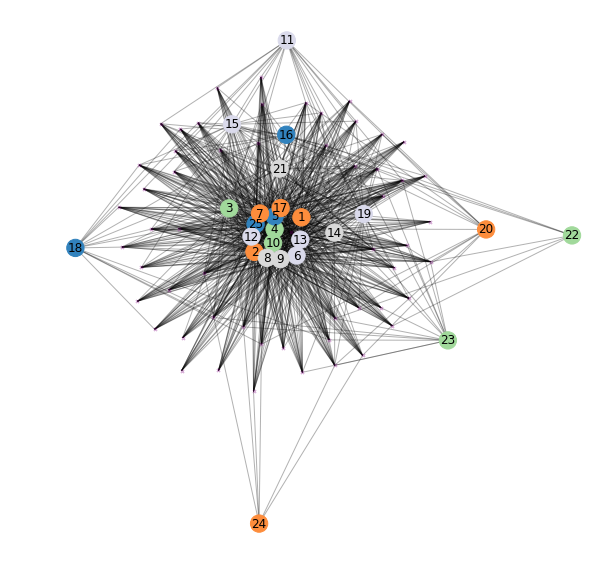


 eigen:


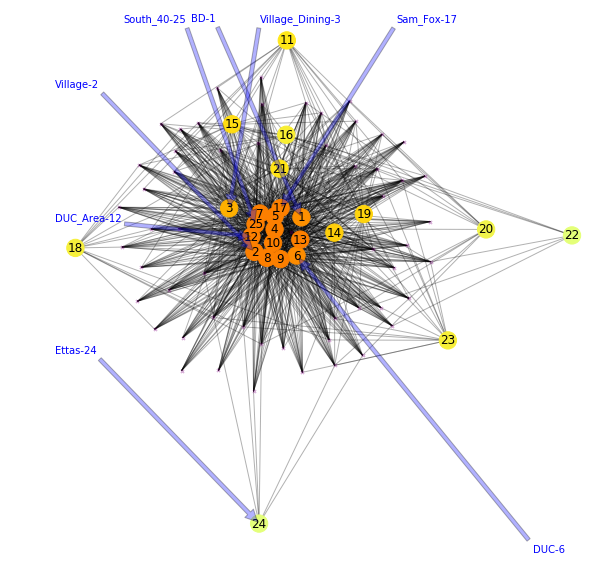

In [594]:
#This is the response as node graph!
studDF = pd.read_csv("data/Student-ID.csv",header=0)

studGraph = nx.from_pandas_edgelist(studDF, source="Source", target="Target", edge_attr=["School","Year"], create_using=nx.DiGraph())

#For adding attributes
sources = ['South_40','Village', 'AC_Frat_Row', 'Bio_Psych', 'Chemistry', 'Engineering_Quad', 'Brown_School', 'Bauer_Law_School', 'DUC_Area', 'Brookings_Quad','Sam_Fox', 'Northwest_Corner']
dining_halls = ['BD', 'Village_Dining','DUC','Law_School_Cafeteria','Loop_Dining','Subway', 'Ettas','Whispers','Stanleys','Einsteins','Off_Campus', 'Bauer_Hall_Cafe', 'Holmes', 'Hillman']
sources_merged = ['South_40','Village', 'AC_Frat_Row', 'Bio_Psych', 'Chemistry', 'Engineering_Quad', 'Brown_School', 'Bauer_Law_School', 'DUC_Area', 'Brookings_Quad','Sam_Fox', 'Northwest_Corner','DUC','Village_Dining','Loop_Dining','Off_Campus']
dining_merged = ['BD', 'Village_Dining','DUC','Law_School_Cafeteria','Loop_Dining','Subway', 'Ettas','Whispers','Stanleys','Einsteins','Off_Campus', 'Bauer_Hall_Cafe', 'Holmes', 'Hillman','DUC_Area','Village']
dining_source = ['Village','Village_Dining','DUC','DUC_Area'] 

nodesOfInterest = ['BD','DUC','DUC_Area','Village','Village_Dining','South_40','Sam_Fox','Ettas']
#THese are the nodes that will be labelled if a draw function is called with labels=True

#Probably unneccessary but I don't want to break anything
contractedMulti = studGraph.copy()
K = contractedMulti


#Set all of the attributes properly
for node in K.nodes():
    if node in nodesOfInterest:
        K.node[node]['label'] = "true"
    else:
        K.node[node]['label'] = "false"
    if node in sources:
        K.node[node]['student'] = "false"
        K.node[node]['type'] = "Source"
    elif node in dining_halls:
        K.node[node]['student'] = "false"
        K.node[node]['type'] = "Dining_Hall"
    else:
        K.node[node]['student'] = "true"
        K.node[node]['type'] = "Student"
        
        
K = K.to_undirected()
newNames = {'South_40':25,'Northest_Corner':26,'BD':1, 'Village':2, 'Village_Dining':3, 'AC_Frat_Row':4, 'Bio_Psych':5, 'DUC':6, 'Chemistry':7, 'Engineering_Quad':8, 'Brown_School':9, 'Bauer_Law_School':10, 'Law_School_Cafeteria':11, 'DUC_Area':12, 'Brookings_Quad':13, 'Whispers':14, 'Holmes':15, 'Hillman':16, 'Sam_Fox':17, 'Stanleys':18, 'Einsteins':19, 'Off_Campus':20, 'Bauer_Hall_Cafe':21, 'Loop_Dining':22, 'Subway':23, 'Ettas':24}
numToName = {x:y for y,x in newNames.items()}
K = nx.relabel_nodes(K,newNames,copy=True)
#Need names as numbers for fun
#Print newNames and numToName if you want a legend ;)

spring_pos = nx.layout.spring_layout(K,scale=10)
louvainDict = louvainDraw(K,spring_pos,False)
eigenDict = eigen(K,spring_pos,True)




865


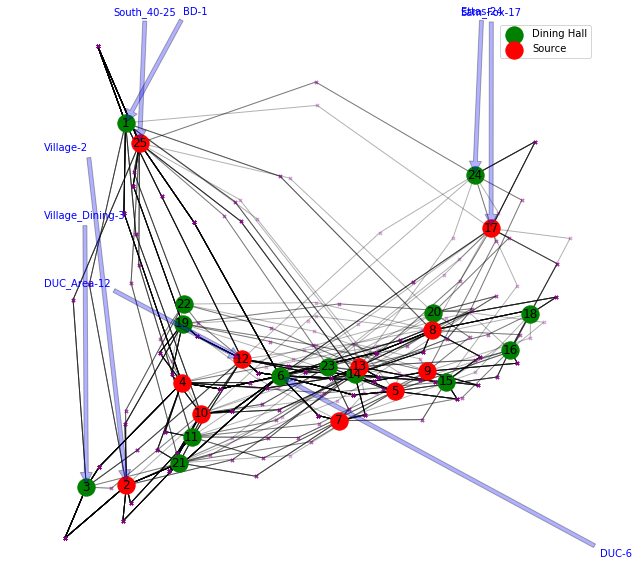

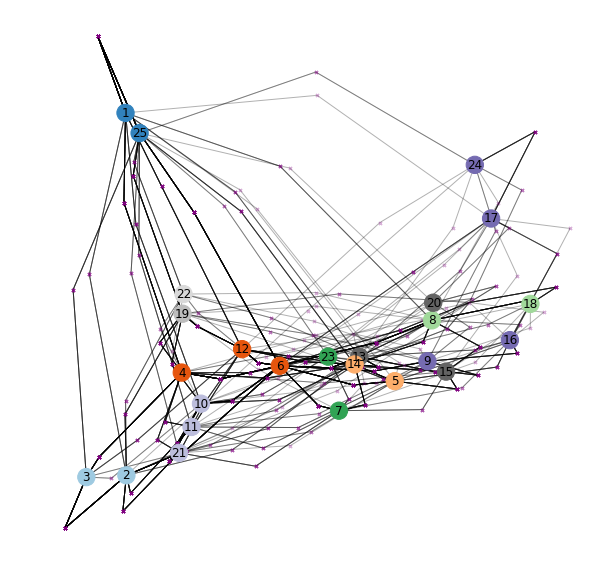


 betweenness:


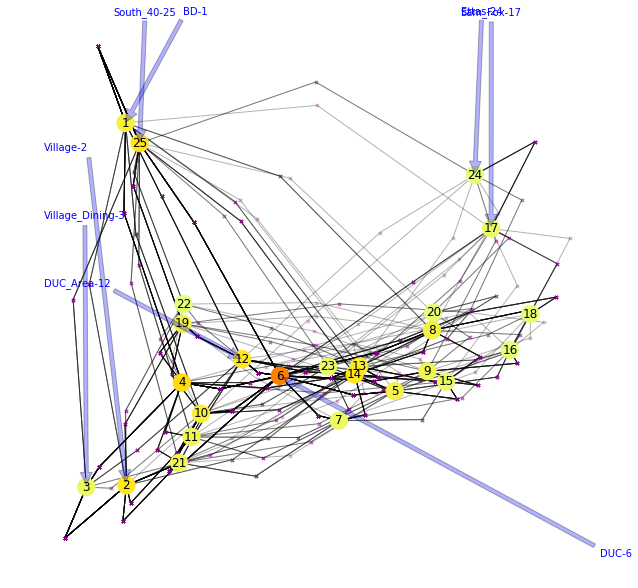

In [595]:
studDF = pd.read_csv("data/Testing-New-Nodes.csv",header=0)
#Pathway as node version!


studGraph = nx.from_pandas_edgelist(studDF, source="Source", target="Target", edge_attr=["School","Year"], create_using=nx.DiGraph())

contractedMulti = studGraph.copy()

K = contractedMulti.to_undirected()
print(nx.number_of_nodes(studGraph))
for node in K.nodes():
    if node in nodesOfInterest:
        K.node[node]['label'] = "true"
    else:
        K.node[node]['label'] = "false"
    if node in sources:
        K.node[node]['student'] = "false"
        K.node[node]['type'] = "Source"
    elif node in dining_halls:
        K.node[node]['student'] = "false"
        K.node[node]['type'] = "Dining_Hall"
    else:
        K.node[node]['student'] = "true"
        K.node[node]['type'] = "Student"
        

newNames = {'South_40':25,'Northest_Corner':26,'BD':1, 'Village':2, 'Village_Dining':3, 'AC_Frat_Row':4, 'Bio_Psych':5, 'DUC':6, 'Chemistry':7, 'Engineering_Quad':8, 'Brown_School':9, 'Bauer_Law_School':10, 'Law_School_Cafeteria':11, 'DUC_Area':12, 'Brookings_Quad':13, 'Whispers':14, 'Holmes':15, 'Hillman':16, 'Sam_Fox':17, 'Stanleys':18, 'Einsteins':19, 'Off_Campus':20, 'Bauer_Hall_Cafe':21, 'Loop_Dining':22, 'Subway':23, 'Ettas':24}
K = nx.relabel_nodes(K,newNames,copy=True)

spectral_pos = nx.layout.spectral_layout(K)

colorDraw(K,spectral_pos,True)

returnedDictLouvain = louvainDraw(K,spectral_pos,False)
returnedDictBetween = betweenness(K,spectral_pos,True)



24
904


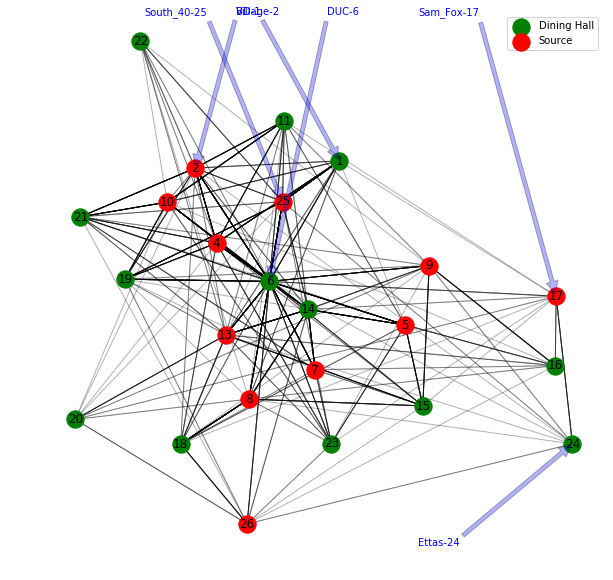

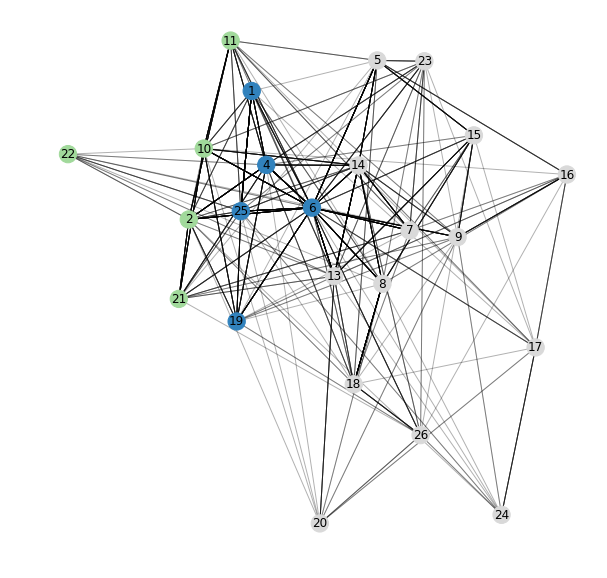


 betweenness:


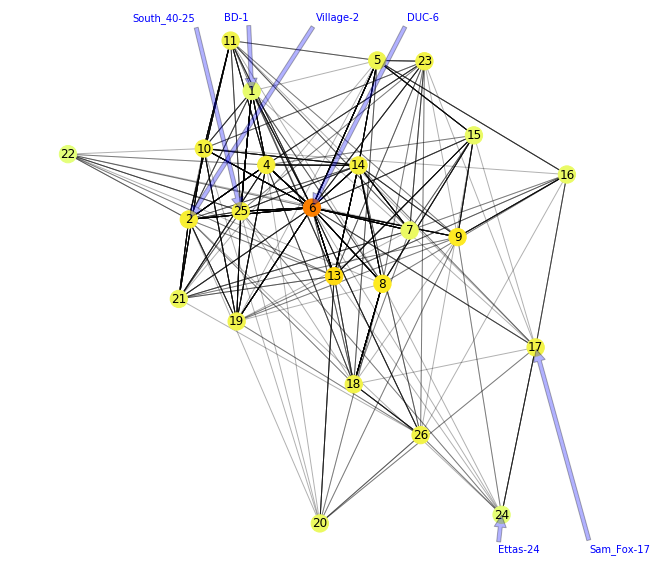


 closeness:


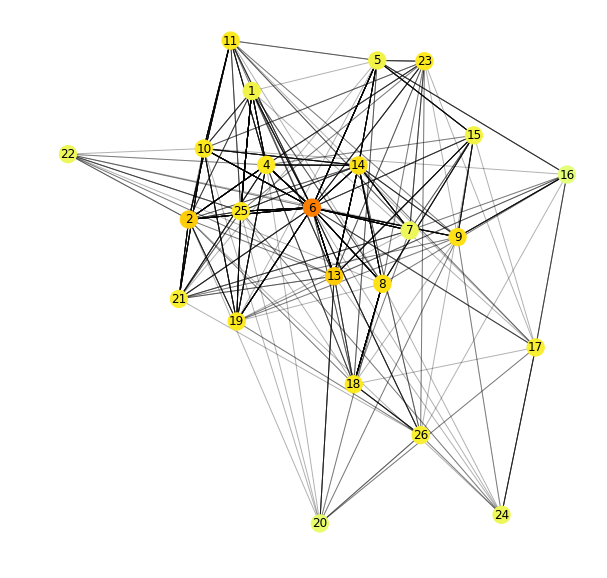

In [593]:
#multigraph!!!

newDF = pd.read_csv("data/CSE-New-Data.csv",header=0)
K = nx.from_pandas_edgelist(newDF, source="Start Area", target="Dining Hall", edge_attr=["School","Year"], create_using=nx.MultiDiGraph())

sources = ['South_40','Village', 'AC_Frat_Row', 'Bio_Psych', 'Chemistry', 'Engineering_Quad', 'Brown_School', 'Bauer_Law_School', 'DUC_Area', 'Brookings_Quad','Sam_Fox', 'Northwest_Corner']
dining_halls = ['BD', 'Village_Dining','DUC','Law_School_Cafeteria','Loop_Dining','Subway', 'Ettas','Whispers','Stanleys','Einsteins','Off_Campus', 'Bauer_Hall_Cafe', 'Holmes', 'Hillman']

sources_merged = ['South_40','Village', 'AC_Frat_Row', 'Bio_Psych', 'Chemistry', 'Engineering_Quad', 'Brown_School', 'Bauer_Law_School', 'DUC_Area', 'Brookings_Quad','Sam_Fox', 'Northwest_Corner','DUC','Village_Dining','Loop_Dining','Off_Campus']
dining_merged = ['BD', 'Village_Dining','DUC','Law_School_Cafeteria','Loop_Dining','Subway', 'Ettas','Whispers','Stanleys','Einsteins','Off_Campus', 'Bauer_Hall_Cafe', 'Holmes', 'Hillman','DUC_Area','Village']

dining_source = ['Village','Village_Dining','DUC','DUC_Area']

nodesOfInterest = ['BD','DUC','DUC_Area','Village','Village_Dining','South_40','Sam_Fox','Ettas']




for node in K.nodes():
    K.node[node]['student'] ='false'
    if node in nodesOfInterest:
        K.node[node]['label'] = "true"
    else:
        K.node[node]['label'] = "false"
    if node in sources:
        K.node[node]['type'] = "Source"
    elif node in dining_halls:
        K.node[node]['type'] = "Dining_Hall"
    else:
        print("wtf")

graphy = nx.contracted_nodes(K,"Village","Village_Dining")
contractedMultiMan = nx.contracted_nodes(graphy,"DUC","DUC_Area")

K = contractedMultiMan.to_undirected()
print(nx.number_of_nodes(K))
print(nx.number_of_edges(K))
newNames = {'South_40':25, 'BD':1, 'Village':2, 'Village_Dining':3, 'AC_Frat_Row':4, 'Bio_Psych':5, 'DUC':6, 'Chemistry':7, 'Engineering_Quad':8, 'Brown_School':9, 'Bauer_Law_School':10, 'Law_School_Cafeteria':11, 'DUC_Area':12, 'Brookings_Quad':13, 'Whispers':14, 'Holmes':15, 'Hillman':16, 'Sam_Fox':17, 'Stanleys':18, 'Einsteins':19, 'Off_Campus':20, 'Bauer_Hall_Cafe':21, 'Loop_Dining':22, 'Subway':23, 'Ettas':24, 'Northwest_Corner':26,'Northest_Corner':27}
K = nx.relabel_nodes(K,newNames,copy=True)

# parts = community_louvain.best_partition(K)
# values = [parts.get(node) for node in K.nodes()]
# # sc.cluster.hierarchy.dendrogram(dendro)
# # plt.show()

colorDraw(K,nx.layout.spring_layout(K),True)

theNodes = [x for x,y in K.nodes(data=True)]


spring_pos = nx.layout.spring_layout(K)

partDict = louvainDraw(K,spring_pos,False)


betweenDict = betweenness(K, spring_pos,True)


closeDict = closeness(K,spring_pos,False)

